In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

In [2]:
#amazon_df = pd.read_csv('../amazon_prime_titles.csv')
#disney_df = pd.read_csv('../disney_plus_titles.csv')
#netflix_df = pd.read_csv('../netflix_titles.csv')
#oscar_df = pd.read_csv('../the_oscar_award.csv')
#rt_movies = pd.read_csv('../rotten_tomatoes_movies.csv')
rt_movies_oscars = pd.read_csv('../data/rotten_tomatoes_movies_with_oscars.csv')
rt_critic = pd.read_csv('../data/rotten_tomatoes_critic_reviews.csv')

os.listdir('../data/')

['rotten_tomatoes_critic_reviews.csv',
 'the_oscar_award.csv',
 'IMDb movies.csv',
 'rotten_tomatoes_movies_with_oscars.csv',
 'rotten_tomatoes_movies.csv',
 'Tables for EDA Presentation.xlsx',
 'amazon_prime_titles.csv',
 'features.csv',
 'feature_stats.csv',
 'disney_plus_titles.csv',
 'netflix_titles.csv',
 'actor_director_weights_wTitle_v2.csv']

In [3]:
# Clean Data Types
rt_movies_oscars.head()

# Set dates as datetime
rt_movies_oscars.original_release_date = pd.to_datetime(rt_movies_oscars.original_release_date)
rt_movies_oscars.streaming_release_date = pd.to_datetime(rt_movies_oscars.streaming_release_date)
rt_movies_oscars['oscar_nomination'] = [0 if x == 'FALSE' else 1 
                                        for x in rt_movies_oscars.oscar_nomination]
rt_movies_oscars['tomatometer_status'] = ['F' if 'Fresh' in str(x) else 'R' if 'Rotten' in str(x) else np.nan for x in rt_movies_oscars.tomatometer_status]

In [4]:
# rt_critic EDA
display(rt_critic.head())
print(rt_critic.columns)
display(rt_critic.describe())
print(rt_critic.isna().sum())

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content'],
      dtype='object')


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
count,1130017,1111488,1130017,1130017,1130017,824081,1130017,1064211
unique,17712,11108,2,2230,2,814,8015,949181
top,m/star_wars_the_rise_of_skywalker,Emanuel Levy,False,New York Times,Fresh,3/5,2000-01-01,Parental Content Review
freq,992,8173,841481,13293,720210,90273,48019,267


rotten_tomatoes_link         0
critic_name              18529
top_critic                   0
publisher_name               0
review_type                  0
review_score            305936
review_date                  0
review_content           65806
dtype: int64


In [5]:
#RT movies EDA
# rt_critic EDA
display(rt_movies_oscars.head())
print(rt_movies_oscars.columns)
display(rt_movies_oscars.describe())
print(rt_movies_oscars.isna().sum())


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,oscar_nomination
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,R,49.0,149.0,Spilled,53.0,254421.0,43,73,76,0
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,F,87.0,142.0,Upright,64.0,11574.0,44,123,19,0
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,F,67.0,24.0,Spilled,53.0,14684.0,2,16,8,0
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,F,100.0,54.0,Upright,97.0,105386.0,6,54,0,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,F,89.0,27.0,Upright,74.0,68918.0,5,24,3,0


Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'oscar_nomination'],
      dtype='object')


,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,oscar_nomination
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139,0.008130
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435,0.089802
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000,0.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000,0.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000,0.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000,1.000000


rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
oscar_nomination                       0
dtype: int64


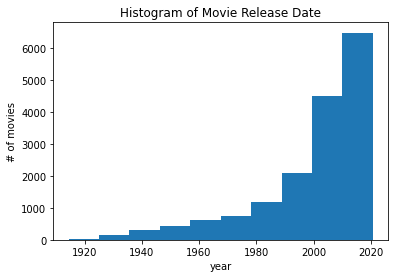

0.10   1970-02-05 00:00:00
0.15   1981-01-01 00:00:00
0.20   1988-01-01 00:00:00
0.25   1993-05-08 18:00:00
0.30   1997-05-02 00:00:00
0.35   2000-03-30 06:00:00
0.50   2006-10-27 00:00:00
0.75   2013-11-01 00:00:00
0.90   2017-09-01 00:00:00
0.95   2018-11-30 00:00:00
Name: original_release_date, dtype: datetime64[ns]
0.5, 0.75, 0.9, 0.95
['1931-08-20T18:21:36.000000014' '1933-12-22T00:00:00.000000000'
 '1935-03-20T04:29:16.800000032' '1935-08-21T08:16:04.800000013']


In [6]:
# Distribution of Release date - look at dates after 1969-12-31
plt.hist(rt_movies_oscars.original_release_date)
plt.title('Histogram of Movie Release Date')
plt.xlabel('year')
plt.ylabel('# of movies')
plt.show()

print(rt_movies_oscars.original_release_date.quantile([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.5, 0.75, 0.9, 0.95]))
print('0.5, 0.75, 0.9, 0.95')
print(np.percentile(rt_movies_oscars.original_release_date, [0.5, 0.75, 0.9, 0.95]))

# Filtering data
Columns needed for analysis: ['rotten_tomatoes_link', ['movie_title'], ['critics_consensus'],
'content_rating', 'genres', 'directors', 'actors', 'original_release_date', 'streaming_release_date',
'runtime', 'production company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'oscar_nomination']
1. Filter out any missing datas
2. Set release data threshold (0.20   1998-01-01 00:00:00) - Start date of RT reviews - encompuses 70% of movies

In [8]:
# Apply Fitlering

#rt_movies_oscars = rt_movies_oscars.iloc[rt_movies_oscars.loc[:,['genres', 'directors', 'tomatometer_status']].dropna().index,:]
rt_movies_oscars = rt_movies_oscars[rt_movies_oscars.original_release_date >= pd.to_datetime('01-01-1998')]

# histogram of the # of reviews for filtering
coluindex ['tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']


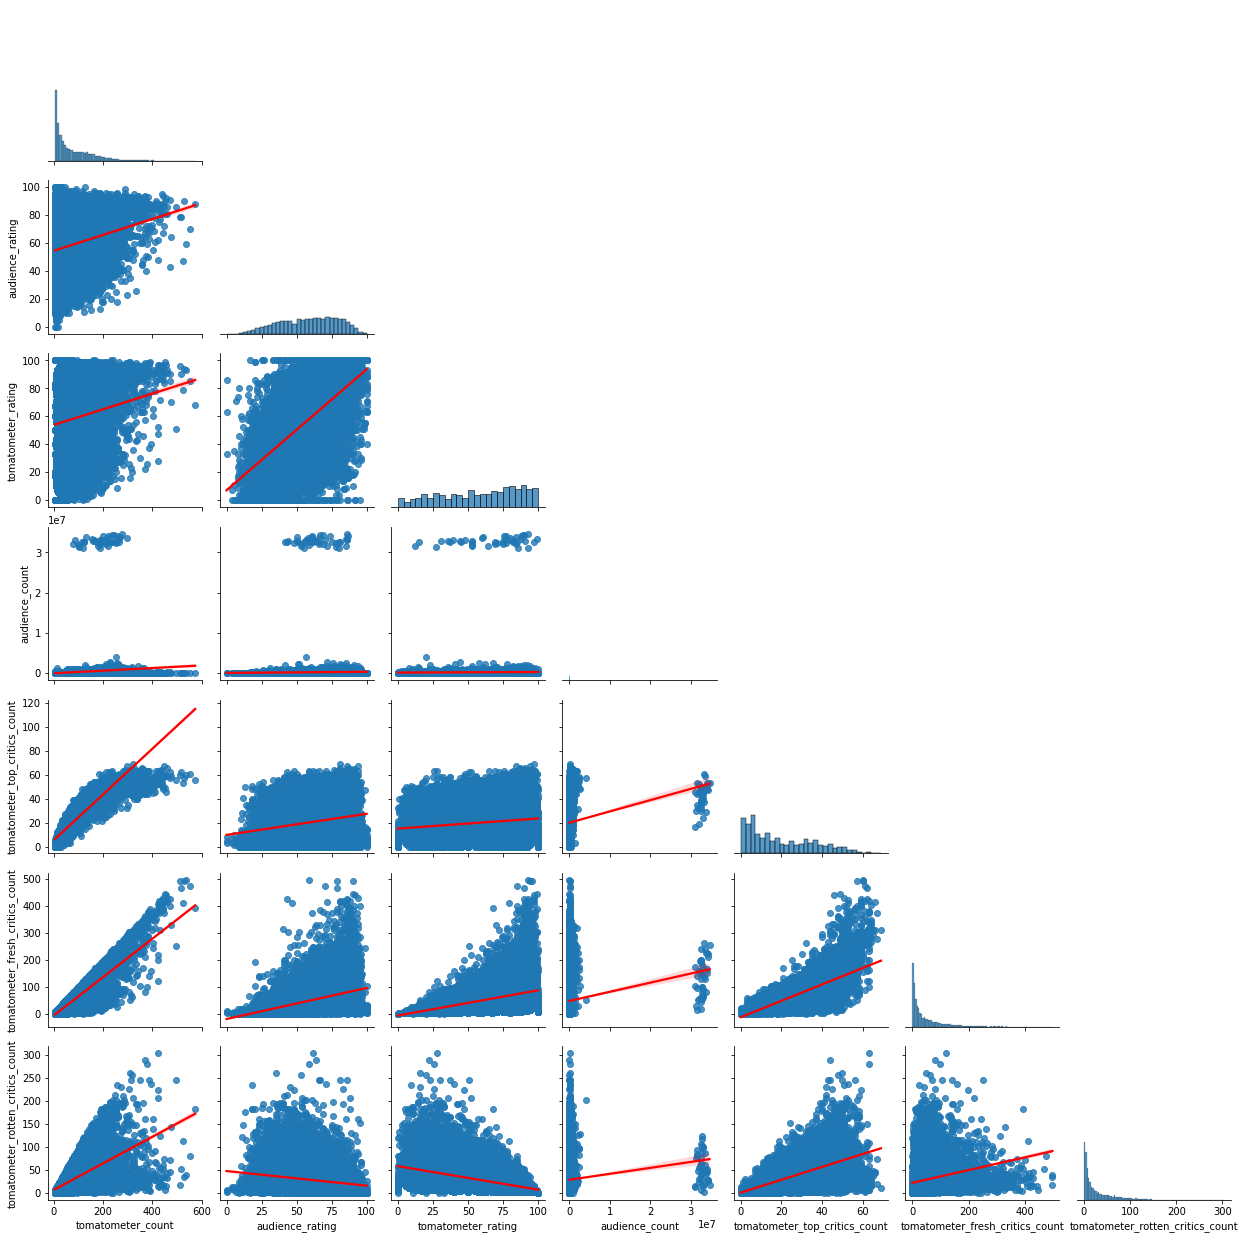

In [5]:
columns = ['tomatometer_count', 'audience_status', 'audience_rating', 'tomatometer_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
sub_rt_movies = rt_movies_oscars.loc[:, columns]
sns.pairplot(sub_rt_movies, kind="reg", corner=True, plot_kws={'line_kws':{'color':'red'}})



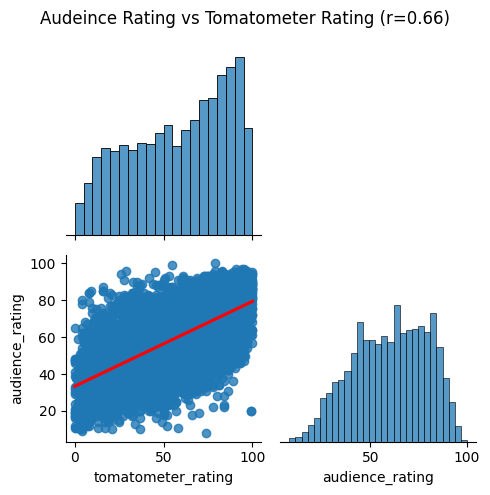

In [25]:
rt_movies_oscars_noNa = rt_movies_oscars.dropna(axis=0)

#sns.scatterplot(rt_movies_oscars_noNa.tomatometer_rating, rt_movies_oscars_noNa.audience_rating)
g = sns.pairplot(rt_movies_oscars_noNa[['tomatometer_rating',
                                    'audience_rating']], kind="reg", corner=True, plot_kws={'line_kws':{'color':'red'}})
cor = np.corrcoef(rt_movies_oscars_noNa['tomatometer_rating'], rt_movies_oscars_noNa['audience_rating'])
#print(cor)
#, loc='top')
g.fig.suptitle('Audeince Rating vs Tomatometer Rating (r={:.2f})'.format(cor[0,1]))
#plt.title('Audeince Rating vs Tomatometer Rating (r={:.2f})'.format(cor[0,1]))
plt.tight_layout()
          

In [6]:
# Correlation matrix of RT_movies_oscars
rt_movies_oscars.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/p6/00y41znj7jggcyxfgg0f9m1r0000gn/T/ipykernel_69465/1601961333.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  rt_movies_oscars.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,oscar_nomination
runtime,1.00,0.08,0.38,0.22,0.07,0.36,0.35,0.23,0.17
tomatometer_rating,0.08,1.00,0.15,0.62,0.02,0.15,0.43,-0.41,0.12
tomatometer_count,0.38,0.15,1.00,0.22,0.12,0.92,0.90,0.64,0.30
audience_rating,0.22,0.62,0.22,1.00,0.03,0.22,0.38,-0.18,0.14
audience_count,0.07,0.02,0.12,0.03,1.00,0.12,0.11,0.08,0.03
tomatometer_top_critics_count,0.36,0.15,0.92,0.22,0.12,1.00,0.80,0.64,0.23
tomatometer_fresh_critics_count,0.35,0.43,0.90,0.38,0.11,0.80,1.00,0.24,0.37
tomatometer_rotten_critics_count,0.23,-0.41,0.64,-0.18,0.08,0.64,0.24,1.00,0.01
oscar_nomination,0.17,0.12,0.30,0.14,0.03,0.23,0.37,0.01,1.00


number movies with nomination: 11417


11417

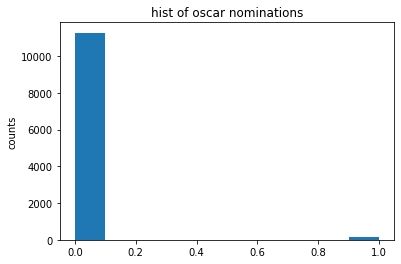

In [10]:
plt.hist(rt_movies_oscars.oscar_nomination)
plt.title('hist of oscar nominations')
plt.ylabel('counts')
print('number movies with nomination: {}'.format(rt_movies_oscars[rt_movies_oscars.oscar_nomination != 'FALSE'].shape[0]))
rt_movies_oscars[rt_movies_oscars.oscar_nomination != 'FALSE'].shape[0]

In [ ]:
# imdb - trying to incorporate IMDB dataset --- not needed anymore 06/25/2022

# imdb_df = pd.read_csv('../IMDb movies.csv')
# imdb_df.head()
# #imdb_df.year = pd.to_datetime(imdb_df.year, format='Y')
# sub_imdb_df = imdb_df[imdb_df.year >= 2018]
# print(sub_imdb_df.columns)
# sub_imdb_df.sort_values('title').tail(10)

In [ ]:
# imdb - trying to merge IMDB dataset --- not needed anymore 06/25/2022

# columns = imdb_df.columns.values
# columns[2] = 'movie_title'
# imdb_df = imdb_df.replace('&', 'and')
# rt_movies_oscars = rt_movies_oscars.replace('&', 'and')
# imdb_df.columns = columns
# print(imdb_df.columns)
# (imdb_df.merge(rt_movies_oscars)) #cannot do a merge on only title!!!
# rt_movies_oscars.head().columns

In [21]:
# Trying to use fuzzy logic - not needed anymore - 06/25/2022
# from fuzzywuzzy import fuzz
# from fuzzywuzzy import process as fuzz_process
# from tqdm import tqdm
# vec = [fuzz_process.extractOne(x, sub_imdb_df.title)[0] for 
#                              x in sub_rt_movies_oscars.movie_title]

# EDA for Week 8 presentation

1. Oscar nominations: is oscar nomination geared towards critic or viewer reviews (Dimitrios)
    - tomatometer_rating, 
    - 'audience_rating'
    - 'oscar_nomination'
    - 'tomatometer_top_critics_count'
    - Do we want to use audience status? different rating system than tomatometer_status
2. Label encoding for the actors/directors (Dimitrios)
3. Count of reviews (Dimitrios)
    - 'tomatometer_count'
    - 'tomatometer_fresh_critics_count'
    - 'tomatometer_rotten_critics_count'
    - Sum of fresh and rotten critics = 'tomatometer_count'
    - 'audience_count'
4. Are tomatometer statuses more aligned with critic or audience ratings?


So columns we need are:
columns =  ['rotten_tomatoes_link', 'movie_title', 'directors', 'actors', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'audience_status', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count', 'oscar_nomination']

    tomatometer_rating  audience_rating  oscar_nomination
0                 49.0             53.0                 0
1                 87.0             64.0                 0
5                  8.0             37.0                 0
8                 20.0             87.0                 0
10                80.0             66.0                 0
Look at NA vals
tomatometer_rating     26
audience_rating       159
oscar_nomination        0
dtype: int64

shape of data:  (11252, 3)



/Users/dimitriospsaltos/anaconda3/envs/w207/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


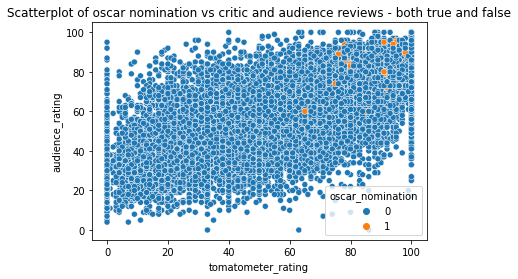

/Users/dimitriospsaltos/anaconda3/envs/w207/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[[1.         0.22484554]
 [0.22484554 1.        ]]


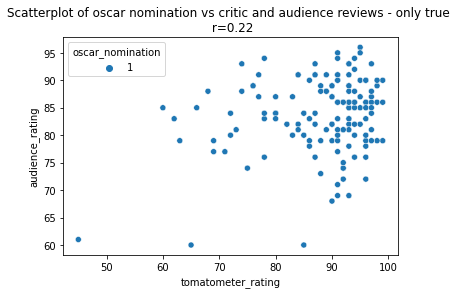

Median critic rating for oscar winners: 91.00
Median audience rating for oscar winners: 85.00


/var/folders/p6/00y41znj7jggcyxfgg0f9m1r0000gn/T/ipykernel_91907/2141078172.py:36: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  'audience_rating']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,tomatometer_rating,audience_rating
tomatometer_rating,1.00,0.22
audience_rating,0.22,1.00


In [8]:
# EDA question 1

# pt1_eda_dat = rt_movies_oscars.loc[:, ['tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
#                                        'audience_status', 'audience_rating', 'audience_count',
#                                        'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
#                                        'tomatometer_rotten_critics_count', 'oscar_nomination']]

pt1_eda_dat = rt_movies_oscars.loc[:, ['tomatometer_rating', 'audience_rating', 'oscar_nomination']]

print(pt1_eda_dat.head())
print('Look at NA vals')
print(pt1_eda_dat.isna().sum())

pt1_eda_dat = pt1_eda_dat.dropna(axis = 0)
print()
print('shape of data: ', pt1_eda_dat.shape)
print()

plt.figure(1)
sns.scatterplot(pt1_eda_dat.tomatometer_rating, pt1_eda_dat.audience_rating, hue = pt1_eda_dat['oscar_nomination'])
plt.title('Scatterplot of oscar nomination vs critic and audience reviews - both true and false')
plt.show()
# Filter for only oscar noms
plt.figure(2)
filt_oscar_pt1 = pt1_eda_dat[pt1_eda_dat.oscar_nomination == 1]
sns.scatterplot(filt_oscar_pt1.tomatometer_rating, filt_oscar_pt1.audience_rating, hue = filt_oscar_pt1['oscar_nomination'])
corr_rating = np.corrcoef(filt_oscar_pt1.tomatometer_rating, filt_oscar_pt1.audience_rating)
print(corr_rating)
plt.title('Scatterplot of oscar nomination vs critic and audience reviews - only true \n r={:.2f}'.format(corr_rating[0, 1]))
plt.show()
# Look at median rating for critics and audience for oscar movies
print('Median critic rating for oscar winners: {:.2f}'.format(np.nanmedian(filt_oscar_pt1.tomatometer_rating)))
print('Median audience rating for oscar winners: {:.2f}'.format(np.nanmedian(filt_oscar_pt1.audience_rating)))

filt_oscar_pt1.loc[:, ['tomatometer_rating',
                    'audience_rating']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


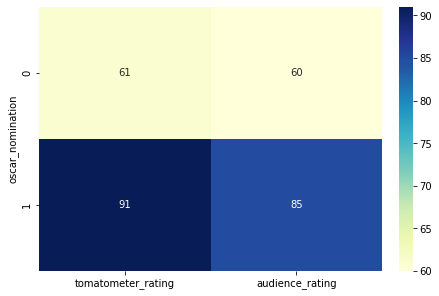

tomatometer_rating                                          \
                              count       mean        std   min   25%   50%   
oscar_nomination                                                              
0                           11108.0  57.581743  28.110835   0.0  34.0  61.0   
1                             144.0  88.020833   9.339344  45.0  85.0  91.0   

                              audience_rating                              \
                   75%    max           count       mean        std   min   
oscar_nomination                                                            
0                 82.0  100.0         11108.0  58.518995  20.219247   0.0   
1                 94.0   99.0           144.0  83.708333   6.813063  60.0   

                                           
                   25%   50%   75%    max  
oscar_nomination                           
0                 43.0  60.0  75.0  100.0  
1                 80.0  85.0  89.0   96.0

In [85]:
# difference between median tomatometer rating for audence and tomatometer rating
sns.heatmap(pt1_eda_dat.groupby('oscar_nomination').median(), cmap='YlGnBu', annot=True)
plt.show()

pt1_eda_dat.groupby('oscar_nomination').describe()

Text(0.5, 1.0, 'tomatometer rating hist')

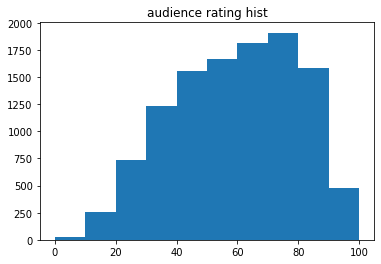

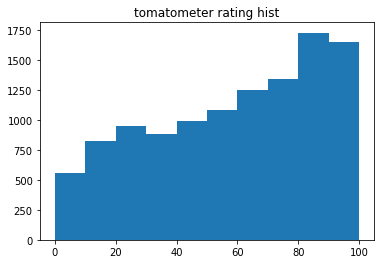

In [24]:
plt.figure(1)
plt.hist(pt1_eda_dat.audience_rating)
plt.title('audience rating hist')

plt.figure(2)
plt.hist(pt1_eda_dat.tomatometer_rating)
plt.title('tomatometer rating hist')

# Are oscar winners more geared towards critic or audience reviews?

Data transformation: Oscar winner was transformed into a binary variable (0,1) for false and true respectively. Removed any missing data in these fields.

Filtering on only movies which won oscar best picture. We see that there is low correlation bewteen the critic and audience ratings (r=0.22). Critic reviews tended to be about 6 units higher for oscar winners rather than audience reviews (median review was used to avoid outliers): 

- Median critic rating for oscar winners: 91.00
- Median audience rating for oscar winners: 85.00

In [25]:
# EDA Question 2: Label encoding for the actors/directors (Dimitrios)

# Clean data -
#pt2_eda_dat = rt_movies_oscars.loc[:,['genres', 'directors', 'tomatometer_status', 'actors']]
pt2_eda_dat = rt_movies_oscars.loc[:,['directors', 'tomatometer_status', 'actors']]
# Split generes and directors for counts 
pt2_eda_dat.columns
pt2_eda_dat.head()

print('Look at NA vals')
print(pt2_eda_dat.isna().sum())

pt2_eda_dat = pt2_eda_dat.dropna(axis = 0)

# Encode tomatometer status
tomatoemeter_status_categories = pt2_eda_dat['tomatometer_status'].unique()
# Transform categorical content rating into numeric
print(tomatoemeter_status_categories)
pt2_eda_dat['encoded_tomatometerStatus'] = LabelEncoder().fit_transform(pt2_eda_dat['tomatometer_status'])

# pt2_eda_dat['genres_list'] = [x.split(', ') for x in tqdm(pt2_eda_dat.genres)]

## How to handle people wiht ..jr in name... Replace the values so we dont mess up splits

pt2_eda_dat['directors_list'] = [x.replace(', Jr.', '-jr').replace(', Sr.', '-sr').split(', ') for x in tqdm(pt2_eda_dat.directors)]
pt2_eda_dat['actors_list'] = [x.replace(', Jr.', '-jr').replace(', Sr.', '-sr').split(', ') for x in tqdm(pt2_eda_dat.actors)]

pt2_eda_dat['directors_counts'] = [len(x) for x in pt2_eda_dat.directors_list]
pt2_eda_dat['actors_counts'] = [len(x) for x in pt2_eda_dat.actors_list]

# # concatenate to get list of all directors/genres etc.. 
#all_genres = np.concatenate(pt2_eda_dat.genres_list.values)
all_directors = np.concatenate(pt2_eda_dat.directors_list.values)
all_actors = np.concatenate(pt2_eda_dat.actors_list.values)



Look at NA vals
directors             134
tomatometer_status     26
actors                260
dtype: int64
['R' 'F']


100%|████████████████████████████████████████████████| 11032/11032 [00:00<00:00, 98729.30it/s]


/Users/dimitriospsaltos/anaconda3/envs/w207/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


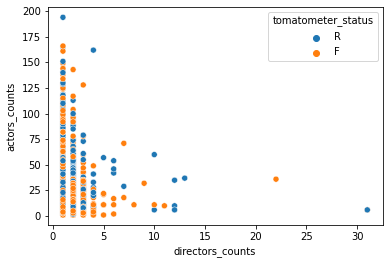

/var/folders/p6/00y41znj7jggcyxfgg0f9m1r0000gn/T/ipykernel_91907/3721839830.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  'encoded_tomatometerStatus']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,directors_counts,actors_counts,encoded_tomatometerStatus
directors_counts,1.00,-0.02,-0.03
actors_counts,-0.02,1.00,0.13
encoded_tomatometerStatus,-0.03,0.13,1.00


In [30]:
# Look at the # of actors count vs tomatoemeter status
sns.scatterplot(pt2_eda_dat.directors_counts, pt2_eda_dat.actors_counts, hue = pt2_eda_dat.tomatometer_status)
plt.show()

pt2_eda_dat.loc[:, ['directors_counts',
                    'actors_counts',
                   'encoded_tomatometerStatus']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)



directors_counts                                          \
                              count      mean       std  min  25%  50%  75%   
tomatometer_status                                                            
F                            5780.0  1.165225  0.689226  1.0  1.0  1.0  1.0   
R                            5252.0  1.128142  0.662797  1.0  1.0  1.0  1.0   

                         actors_counts                                         \
                     max         count       mean        std  min   25%   50%   
tomatometer_status                                                              
F                   31.0        5780.0  20.473356  19.244139  1.0   8.0  14.0   
R                   31.0        5252.0  25.568355  20.296434  1.0  10.0  19.0   

                                 
                     75%    max  
tomatometer_status               
F                   27.0  166.0  
R                   35.0  194.0

/Users/dimitriospsaltos/anaconda3/envs/w207/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dimitriospsaltos/anaconda3/envs/w207/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tomatometer_status', ylabel='actors_counts'>

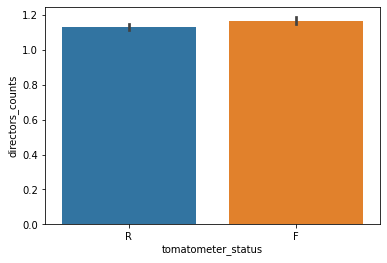

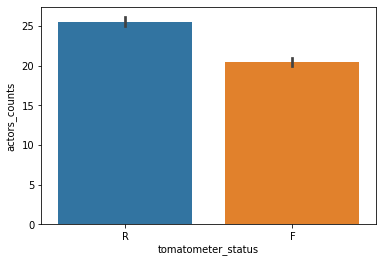

In [36]:
display(pt2_eda_dat.loc[:, ['directors_counts',
                    'actors_counts',
                   'tomatometer_status']].groupby('tomatometer_status').describe())
plt.figure(1)
sns.barplot(pt2_eda_dat.tomatometer_status, pt2_eda_dat.directors_counts)

plt.figure(2)
sns.barplot(pt2_eda_dat.tomatometer_status, pt2_eda_dat.actors_counts)

In [37]:
# look at data summaries
display(pd.DataFrame(all_actors).describe())
display(pd.DataFrame(all_actors).value_counts().describe())
display(pd.DataFrame(all_directors).describe())
display(pd.DataFrame(all_directors).value_counts().describe())

,0
count,252621
unique,134813
top,Samuel L. Jackson
freq,72


count    134813.000000
mean          1.873862
std           3.001414
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          72.000000
dtype: float64

,0
count,12660
unique,7226
top,Steven Soderbergh
freq,22


count    7226.000000
mean        1.752007
std         1.621294
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        22.000000
dtype: float64

n unique actors: 134813
n unique directors: 7226

directors table
Steven Soderbergh       22
Tyler Perry             19
Michael Winterbottom    19
Woody Allen             18
Clint Eastwood          17
Alex Gibney             16
Ron Howard              16
Spike Lee               15
Richard Linklater       15
Ridley Scott            15
dtype: int64

actors table
Samuel L. Jackson    72
James Franco         67
J.K. Simmons         62
Bruce Willis         62
Nicolas Cage         60
Liam Neeson          59
Steve Buscemi        57
Ben Kingsley         57
Matt Damon           56
Morgan Freeman       55
dtype: int64


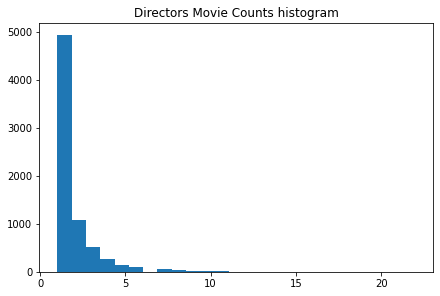

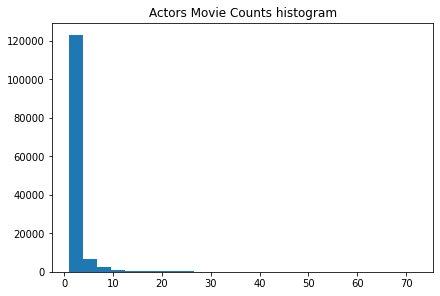

In [86]:
print('n unique actors: {}'.format(len(np.unique(all_actors))))
print('n unique directors: {}'.format(len(np.unique(all_directors))))

plt.figure(1)
plt.hist(pd.DataFrame(all_directors).value_counts(), bins=25)
plt.title('Directors Movie Counts histogram')
print()
print('directors table')
print(pd.DataFrame(all_directors).value_counts().head(10))
# Directors histogram - will not remove any directors becuase want to see if 1 off movies make a difference

plt.figure(2)
plt.hist(pd.DataFrame(all_actors).value_counts(), bins=25)
plt.title('Actors Movie Counts histogram')
print()
print('actors table')
print(pd.DataFrame(all_actors).value_counts().head(10))

actor_weights = pd.DataFrame(pd.DataFrame(all_actors).value_counts(), columns=['weights']).reset_index()
actor_weights.columns = ['actors', 'weights']
director_weights = pd.DataFrame(pd.DataFrame(all_directors).value_counts(), columns=['weights']).reset_index()
director_weights.columns = ['directors', 'weights']




In [78]:
# pt2_eda_dat['actors_list_values'] = 
# pt2_eda_dat['actors_list'].map({v:i[0] for i in l for v in i})
actors_sums = []
for index, row in tqdm(pt2_eda_dat.iterrows()):
    row_vals = []
    #print(row['actors_list'])
    for i in range(len(row['actors_list'])):
        #print(pt2_eda_dat['actors_list'].iloc[10][i])

        row_vals.append(int(actor_weights[actor_weights.actors ==
                                      row['actors_list'][i]].weights.values))
    actors_sums.append(sum(row_vals))
    #print(row_vals)

pt2_eda_dat['actors_value'] = actors_sums

director_sums = []
for index, row in tqdm(pt2_eda_dat.iterrows()):
    row_vals = []
    #print(row['actors_list'])
    for i in range(len(row['directors_list'])):
        #print(pt2_eda_dat['actors_list'].iloc[10][i])

        row_vals.append(int(director_weights[director_weights.directors ==
                                      row['directors_list'][i]].weights.values))
    director_sums.append(sum(row_vals))
    #print(row_vals)

pt2_eda_dat['directors_value'] = director_sums

11032it [3:30:54,  1.15s/it]
11032it [00:49, 223.86it/s]


In [88]:
pt2_eda_dat.to_csv('director_actor_weights.csv',index=False)

count    11032.000000
mean       152.993927
std        141.784446
min          1.000000
25%         41.000000
50%        111.000000
75%        227.000000
max       1189.000000
Name: actors_value, dtype: float64
count    11032.000000
mean         3.732052
std          3.868146
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        114.000000
Name: directors_value, dtype: float64


/Users/dimitriospsaltos/anaconda3/envs/w207/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dimitriospsaltos/anaconda3/envs/w207/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tomatometer_status', ylabel='directors_value'>

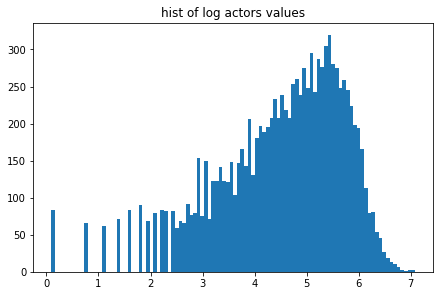

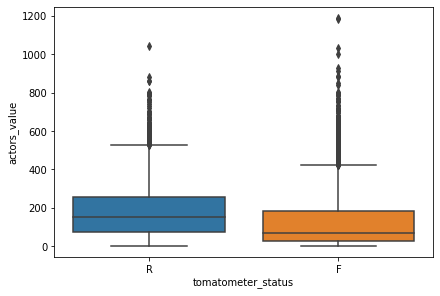

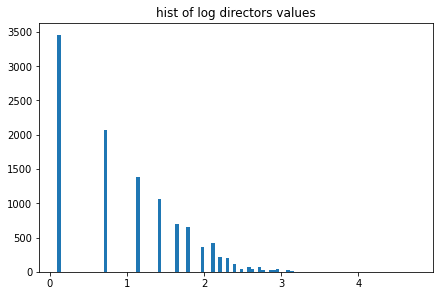

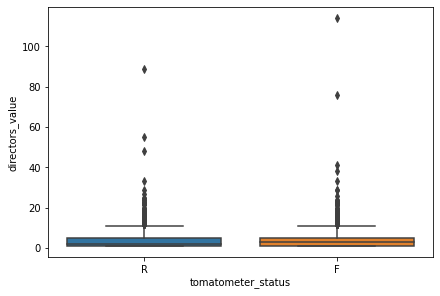

In [83]:
plt.figure(1)
plt.hist(np.log(pt2_eda_dat['actors_value']+0.1), bins = 100)
plt.title('hist of log actors values')
print(pt2_eda_dat['actors_value'].describe())
# pt2_eda_dat.loc[:, ['encoded_tomatometerStatus',
#                     'directors_value']].corr().style.background_gradient(cmap='coolwarm').set_precision(3)
plt.figure(2)
sns.boxplot(pt2_eda_dat.tomatometer_status, pt2_eda_dat.actors_value)


plt.figure(3)
plt.hist(np.log(pt2_eda_dat['directors_value']+0.1), bins = 100)
plt.title('hist of log directors values')
print(pt2_eda_dat['directors_value'].describe())
# pt2_eda_dat.loc[:, ['encoded_tomatometerStatus',
#                     'directors_value']].corr().style.background_gradient(cmap='coolwarm').set_precision(3)

plt.figure(4)
sns.boxplot(pt2_eda_dat.tomatometer_status, pt2_eda_dat.directors_value)


# Question 2 - Label encoding for the actors/directors (Dimitrios)

Are tomatoemeter ratings more geared towards certain actors/directors? 

Ideas on how to generate feature:
- Will label encode actors + directors by using the # of films they have produced as a proxy for their names. Will sum this number for movies with >1 actor or director.
- 

In [6]:
# EDA #3 - Count of reviews (Dimitrios)

# Clean data -
#pt2_eda_dat = rt_movies_oscars.loc[:,['genres', 'directors', 'tomatometer_status', 'actors']]
pt3_eda_dat = rt_movies_oscars.loc[:,['tomatometer_status', 'tomatometer_count', 'tomatometer_fresh_critics_count', 
                                      'tomatometer_rotten_critics_count', 'tomatometer_top_critics_count', 'audience_count']]
# Split generes and directors for counts 
pt3_eda_dat.columns
pt3_eda_dat.head()

print('Look at NA vals')
print(pt3_eda_dat.isna().sum())

pt3_eda_dat = pt3_eda_dat.dropna(axis = 0)

# Encode tomatometer status
tomatoemeter_status_categories = pt3_eda_dat['tomatometer_status'].unique()
# Transform categorical content rating into numeric
pt3_eda_dat['encoded_tomatometerStatus'] = LabelEncoder().fit_transform(pt3_eda_dat['tomatometer_status'])



Look at NA vals
tomatometer_status                   26
tomatometer_count                    26
tomatometer_fresh_critics_count       0
tomatometer_rotten_critics_count      0
tomatometer_top_critics_count         0
audience_count                      160
dtype: int64


tomatometer_status                                 F             R
tomatometer_count                count  5.966000e+03  5.285000e+03
                                 mean   8.596229e+01  6.617029e+01
                                 std    8.693041e+01  6.467488e+01
                                 min    5.000000e+00  5.000000e+00
                                 25%    2.000000e+01  1.400000e+01
                                 50%    5.200000e+01  4.100000e+01
                                 75%    1.310000e+02  1.060000e+02
                                 max    5.740000e+02  4.960000e+02
tomatometer_fresh_critics_count  count  5.966000e+03  5.285000e+03
                                 mean   7.010610e+01  2.293113e+01
                                 std    7.377947e+01  2.827039e+01
                                 min    3.000000e+00  0.000000e+00
                                 25%    1.600000e+01  4.000000e+00
                                 50%    4.200000e+01  1.100000e+01
                                 75%    1.040000e+02  3.200000e+01
                                 max    4.970000e+02  2.520000e+02
tomatometer_rotten_critics_count count  5.966000e+03  5.285000e+03
                                 mean   1.588099e+01  4.324920e+01
                                 std    1.943207e+01  4.219252e+01
                                 min    0.000000e+00  0.000000e+00
                                 25%    3.000000e+00  9.000000e+00
                                 50%    8.000000e+00  2.600000e+01
                                 75%    2.200000e+01  6.900000e+01
                                 max    1.820000e+02  3.030000e+02
audience_count                   count  5.966000e+03  5.285000e+03
                                 mean   2.161922e+05  1.507829e+05
                                 std    2.335788e+06  1.674185e+06
                                 min    5.000000e+00  5.000000e+00
                                 25%    5.380000e+02  6.940000e+02
                                 50%    3.055000e+03  5.293000e+03
                                 75%    2.100275e+04  4.552300e+04
                                 max    3.467977e+07  3.318188e+07
tomatometer_top_critics_count    count  5.966000e+03  5.285000e+03
                                 mean   2.188820e+01  1.809044e+01
                                 std    1.692526e+01  1.491767e+01
                                 min    0.000000e+00  0.000000e+00
                                 25%    7.000000e+00  5.000000e+00
                                 50%    1.700000e+01  1.400000e+01
                                 75%    3.600000e+01  3.000000e+01
                                 max    6.900000e+01  6.300000e+01

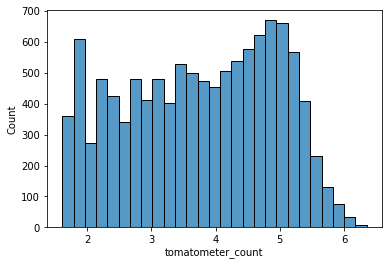

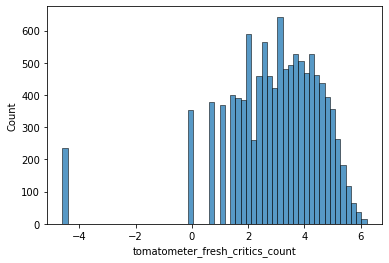

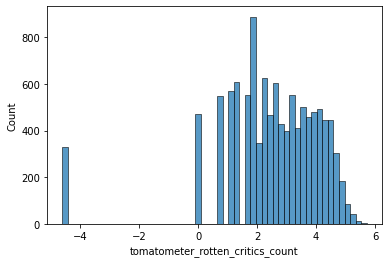

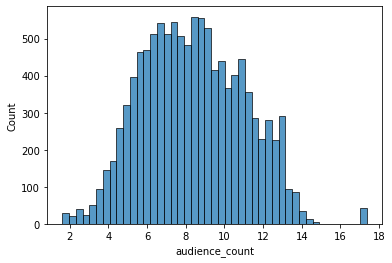

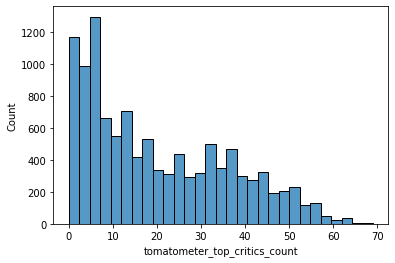

In [8]:
#print(pt3_eda_dat.describe())

# apply log transform due to values on large scale and not normally distributed
plt.figure(1)
sns.histplot(np.log(pt3_eda_dat.tomatometer_count + 0.01))
pt3_eda_dat['log_tomatometer_count'] =np.log(pt3_eda_dat.tomatometer_count + 0.01)
plt.figure(2)
sns.histplot(np.log(pt3_eda_dat.tomatometer_fresh_critics_count + 0.01))
pt3_eda_dat['log_tomatometer_fresh_critics_count'] = np.log(pt3_eda_dat.tomatometer_fresh_critics_count + 0.01)
plt.figure(3)
sns.histplot(np.log(pt3_eda_dat.tomatometer_rotten_critics_count + 0.01))
pt3_eda_dat['log_tomatometer_rotten_critics_count'] = np.log(pt3_eda_dat.tomatometer_rotten_critics_count + 0.01)
plt.figure(4)
sns.histplot(np.log(pt3_eda_dat.audience_count + 0.01))
pt3_eda_dat['log_audience_count'] = np.log(pt3_eda_dat.audience_count + 0.01)

plt.figure(5)
sns.histplot(pt3_eda_dat.tomatometer_top_critics_count)


# pt3_eda_dat = pt3_eda_dat.loc[:, ['log_tomatometer_count', 'log_tomatometer_fresh_critics_count', 
#                                    'log_tomatometer_rotten_critics_count', 'log_audience_count']]
pt3_eda_dat.loc[:, ['tomatometer_count', 'tomatometer_fresh_critics_count',
                    'tomatometer_rotten_critics_count', 'audience_count', 'tomatometer_top_critics_count',
                    'tomatometer_status']].groupby('tomatometer_status').describe().T

In [161]:


pt3_eda_dat.corr().style.background_gradient(cmap='coolwarm').set_precision(3)




/var/folders/p6/00y41znj7jggcyxfgg0f9m1r0000gn/T/ipykernel_90812/3641174131.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pt3_eda_dat.corr().style.background_gradient(cmap='coolwarm').set_precision(3)


,tomatometer_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,tomatometer_top_critics_count,audience_count,encoded_tomatometerStatus,log_tomatometer_count,log_tomatometer_fresh_critics_count,log_tomatometer_rotten_critics_count,log_audience_count
tomatometer_count,1.000,0.900,0.639,0.920,0.123,-0.308,0.874,0.685,0.545,0.636
tomatometer_fresh_critics_count,0.900,1.000,0.240,0.797,0.113,-0.573,0.737,0.690,0.292,0.473
tomatometer_rotten_critics_count,0.639,0.240,1.000,0.642,0.076,0.324,0.646,0.307,0.698,0.583
tomatometer_top_critics_count,0.920,0.797,0.642,1.000,0.120,-0.312,0.925,0.726,0.592,0.700
audience_count,0.123,0.113,0.076,0.120,1.000,-0.039,0.106,0.083,0.069,0.257
encoded_tomatometerStatus,-0.308,-0.573,0.324,-0.312,-0.039,1.000,-0.308,-0.538,0.243,-0.062
log_tomatometer_count,0.874,0.737,0.646,0.925,0.106,-0.308,1.000,0.788,0.658,0.684
log_tomatometer_fresh_critics_count,0.685,0.690,0.307,0.726,0.083,-0.538,0.788,1.000,0.292,0.450
log_tomatometer_rotten_critics_count,0.545,0.292,0.698,0.592,0.069,0.243,0.658,0.292,1.000,0.552
log_audience_count,0.636,0.473,0.583,0.700,0.257,-0.062,0.684,0.450,0.552,1.000


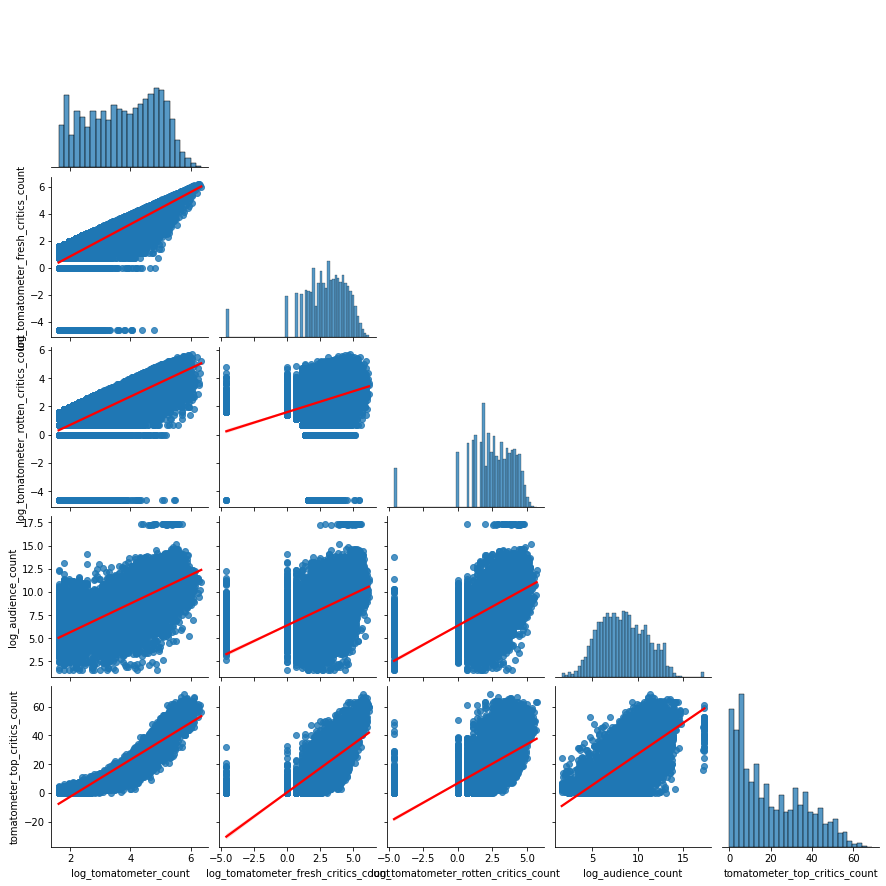

In [162]:
sns.pairplot(pt3_eda_dat.loc[:, ['log_tomatometer_count', 'log_tomatometer_fresh_critics_count', 
                                    'log_tomatometer_rotten_critics_count', 'log_audience_count',
                                'tomatometer_top_critics_count']],
                             kind="reg", corner=True, plot_kws={'line_kws':{'color':'red'}})


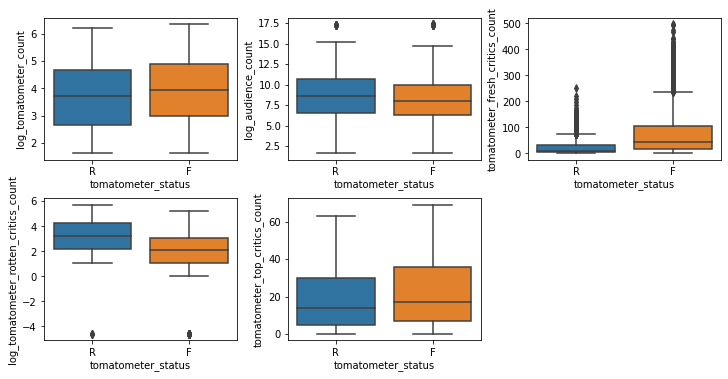

<Figure size 432x288 with 0 Axes>

In [76]:
pt3_eda_dat.loc[:,['tomatometer_status', 'tomatometer_count', 'tomatometer_fresh_critics_count', 
                   'tomatometer_rotten_critics_count', 'tomatometer_top_critics_count',
                   'audience_count']].groupby('tomatometer_status').describe().T

plt.figure(figsize=(10,5))
plt.subplot(231)
sns.boxplot(x=pt3_eda_dat.tomatometer_status, y=pt3_eda_dat.log_tomatometer_count)
#plt.show()

plt.subplot(232)
sns.boxplot(x=pt3_eda_dat.tomatometer_status, y=pt3_eda_dat.log_audience_count)
#plt.show()

plt.subplot(233)
sns.boxplot(x=pt3_eda_dat.tomatometer_status, y=pt3_eda_dat.tomatometer_fresh_critics_count)
#plt.show()

plt.subplot(234)
sns.boxplot(x=pt3_eda_dat.tomatometer_status, y=pt3_eda_dat.log_tomatometer_rotten_critics_count)
#plt.show()

plt.subplot(235)
sns.boxplot(x=pt3_eda_dat.tomatometer_status, y=pt3_eda_dat.tomatometer_top_critics_count)
plt.show()

plt.tight_layout()

# Question 3 - Critic Reviews vs tomatoemeter rating

- Transforemed data using natural log tranform due to data not being normally distributed

In [48]:
# EDA 4 - Are tomatoemeter ratings more aligned with critic or audience reviews


pt4_eda_dat = rt_movies_oscars.loc[:,['tomatometer_status', 'tomatometer_rating', 'audience_rating']]
# Split generes and directors for counts 
pt4_eda_dat.columns
pt4_eda_dat.head()

print('Look at NA vals')
print(pt4_eda_dat.isna().sum())

pt4_eda_dat = pt4_eda_dat.dropna(axis = 0)

# Encode tomatometer status
tomatoemeter_status_categories = pt4_eda_dat['tomatometer_status'].unique()
# Transform categorical content rating into numeric
pt4_eda_dat['encoded_tomatometerStatus'] = LabelEncoder().fit_transform(pt4_eda_dat['tomatometer_status'])


#pt4_eda_dat.corr().style.background_gradient(cmap='coolwarm').set_precision(3)
display(pt4_eda_dat.loc[:, ['tomatometer_rating', 'audience_rating', 
                           'tomatometer_status']].groupby('tomatometer_status').describe())

Look at NA vals
tomatometer_status     26
tomatometer_rating     26
audience_rating       159
dtype: int64


tomatometer_rating                                          \
                                count       mean        std   min   25%   50%   
tomatometer_status                                                              
F                              5966.0  80.880489  11.500033  60.0  71.0  82.0   
R                              5286.0  32.115021  16.661764   0.0  19.0  33.0   

                                audience_rating                             \
                     75%    max           count       mean        std  min   
tomatometer_status                                                           
F                   90.0  100.0          5966.0  69.239021  16.046512  0.0   
R                   47.0   59.0          5286.0  47.106129  18.085728  0.0   

                                             
                     25%   50%   75%    max  
tomatometer_status                           
F                   59.0  72.0  82.0  100.0  
R                   33.0  46.0  60.0  100.0

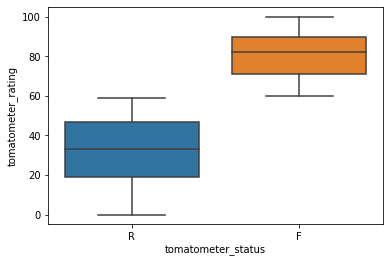

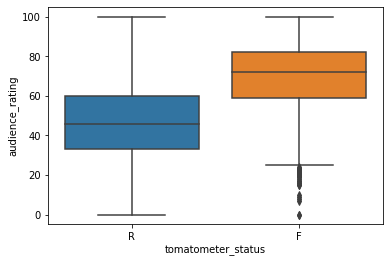

In [56]:
plt.figure(1)
sns.boxplot(x=pt4_eda_dat.tomatometer_status, y=pt4_eda_dat.tomatometer_rating)
plt.show()

plt.figure(2)
sns.boxplot(x=pt4_eda_dat.tomatometer_status, y=pt4_eda_dat.audience_rating)
plt.show()

# Question 4 - Is tomatometer status more tied to audience or critic ratings

Appears there is a significant negative correlation between tomatoemeter rating and tomatoemeter satatus

In [ ]:
# label encoding for categorical variables: content_rating, 

rt_movies_oscars#.replace('Nicole Holofcener', 1)
content_rating_categories = rt_movies_oscars['content_rating'].unique()
# Transform categorical content rating into numeric
rt_movies_oscars['content_rating'] = LabelEncoder().fit_transform(rt_movies_oscars['content_rating'])



In [ ]:
# Looking at Genre

print(all_genres[:10])
pd.DataFrame(pd.DataFrame(all_genres).value_counts()).plot(kind='bar')
plt.hist(pd.DataFrame(all_genres).value_counts())
plt.title('Histogram of Genres')